In [1]:
# Tài liệu tham khảo

#https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python
#https://phamdinhkhanh.github.io/deepai-book/ch_ml/KMeans.html
#https://www.kaggle.com/code/vin1234/practical-interpretation-of-k-mean-clustering-algo/notebook#7.--K-means-Cluster-Creation
#https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

In [2]:
# link data: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [3]:
import warnings   # thư viện dùng để ẩn các warning
warnings.filterwarnings('ignore')

import numpy as np      # thư viện để xử lý các ma trận
import pandas as pd     # thư viện để tạo và xử lý các dataframe

import matplotlib.pyplot as plt    # các thư viện để vẽ biểu đồ
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

# Load dữ liệu

In [4]:
# load dữ liệu
data = pd.read_csv('Live_20210128.csv')
data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
# Hiển thị các mô tả dữ liệu trong DataFrame
data.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [6]:
# Hiển thị thông tin về bộ dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [7]:
# kiểm tra xem có dữ liệu bị thiếu hay không
data.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

# Tiền xử lý dữ liệu

In [8]:
# tách dữ liệu ra chỉ dùng vài thuộc tính để làm dữ liệu phân cụm
columns = ['num_reactions','num_comments', 'num_shares']    # các thuộc tính sử dụng
data_cust = data[columns]       # tách dữ liệu
data_cust

,num_reactions,num_comments,num_shares
0,529,512,262
1,150,0,0
2,227,236,57
3,111,0,0
4,213,0,0
...,...,...,...
7045,89,0,0
7046,16,0,0
7047,2,0,0
7048,351,12,22


In [9]:
# Hiển thị các mô tả dữ liệu trong DataFrame
data_cust.describe()

,num_reactions,num_comments,num_shares
count,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553
std,462.625309,889.636820,131.599965
min,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000
75%,219.000000,23.000000,4.000000
max,4710.000000,20990.000000,3424.000000


In [10]:
# Hiển thị thông tin về bộ dữ liệu
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
dtypes: int64(3)
memory usage: 165.4 KB


In [11]:
# Đầu tiên, chúng ta sẽ giữ lại một bản sao dữ liệu
data_cust_copy = data_cust.copy()

In [12]:
# mã hóa dữ liệu
# scale dữ liệu về một phân bố trong đó giá trị trung bình của các quan sát bằng 0 và độ lệch chuẩn = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scale = scaler.fit_transform(data_cust)        # scale
df_data_scale = pd.DataFrame(data_scale, columns=columns)   # tạo một DataFrame mới để lưu các giá trị đã scale
df_data_scale = df_data_scale.set_index(data_cust.index)    # set lại index

df_data_scale

,num_reactions,num_comments,num_shares
0,0.646104,0.323350,1.686879
1,-0.173192,-0.252206,-0.304144
2,-0.006738,0.013089,0.129017
3,-0.257499,-0.252206,-0.304144
4,-0.037003,-0.252206,-0.304144
...,...,...,...
7045,-0.305057,-0.252206,-0.304144
7046,-0.462863,-0.252206,-0.304144
7047,-0.493128,-0.252206,-0.304144
7048,0.261316,-0.238717,-0.136959


# Xây dựng mô hình phâm cụm với KMeans

## Xác định K bằng phương pháp Elbow (vẽ đường cong khuỷu tay)

Phương pháp Elbow là một cách giúp ta lựa chọn được số lượng các cụm phù hợp dựa vào đồ thị trực quan hoá bằng cách nhìn vào sự suy giảm của hàm biến dạng và lựa chọn ra điểm khuỷ tay (elbow point)

Điểm khuỷ tay là điểm mà ở đó tốc độ suy giảm của hàm biến dạng sẽ thay đổi nhiều nhất. Tức là kể từ sau vị trí này thì gia tăng thêm số lượng cụm cũng không giúp hàm biến dạng giảm đáng kể.

In [13]:
from sklearn.cluster import KMeans

N_clusters = range(1, 20)     # từ 1-19 cụm
kmeans = [KMeans(n_clusters=i, random_state=42) for i in N_clusters]     # khởi tạo các đối tượng KMeans tương ứng

In [14]:
# Tính xem các điểm quan sát cách trung tâm bao xa
score = [kmeans[i].fit(df_data_scale).inertia_ for i in range(len(kmeans))]  
score 

[21149.999999999993,
 13024.34104804212,
 8206.76763138201,
 6255.137221665818,
 5107.211524076023,
 4324.570767958276,
 3658.0233732306824,
 3047.1059301496052,
 2624.763929952748,
 2325.811710992165,
 2043.5651775853366,
 1852.8425685506866,
 1679.5347028635592,
 1533.6522233472695,
 1383.994022505753,
 1265.578599437178,
 1209.443348467638,
 1101.978636637508,
 1023.5644789304545]

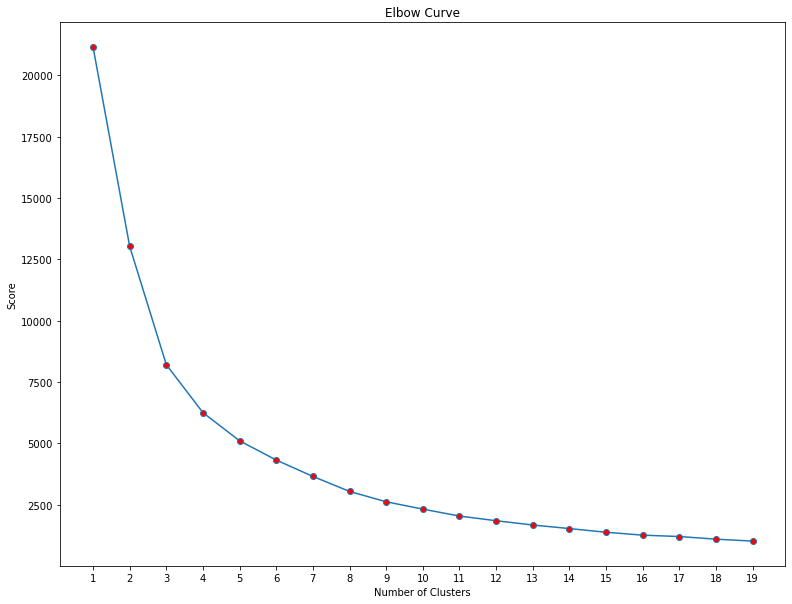

In [15]:
# vẽ biểu đồ để chọn ra giá trị K phù hợp
plt.figure(figsize = (13,10))   # kích thước khung hình của biểu đồ
plt.plot(N_clusters, score, marker='o', markerfacecolor ='red')     # vẽ biểu đồ
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(list(range(1, 20)))      # set lại hiển thị cho trục x tương ứng với từng số cluster
plt.title('Elbow Curve')
plt.show()

Trong hình trên thì ta thấy vị trí của điểm khuỷ tay chính là k = 3 vì khi số lượng cụm lớn hơn 3 thì tốc độ suy giảm của hàm biến dạng dường như không đáng kể so với trước đó.
=> Ta chọn số cụm là 3

# Sử dụng Kmeans để phân cụm

In [16]:
# Tiến hành phân cụm
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_data_scale)
identified_clusters = kmeans.fit_predict(df_data_scale)     # dự đoán cụm
identified_clusters

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
# Hiển thị các thông tin số cụm của từng điểm dữ liệu bằng DataFrame
data_with_clusters = df_data_scale.copy()               # copy dữ liệu ban đầu
data_with_clusters['Clusters'] = identified_clusters    # tạo thêm cột Clusters để lưu thông tin về cụm
data_with_clusters

,num_reactions,num_comments,num_shares,Clusters
0,0.646104,0.323350,1.686879,0
1,-0.173192,-0.252206,-0.304144,0
2,-0.006738,0.013089,0.129017,0
3,-0.257499,-0.252206,-0.304144,0
4,-0.037003,-0.252206,-0.304144,0
...,...,...,...,...
7045,-0.305057,-0.252206,-0.304144,0
7046,-0.462863,-0.252206,-0.304144,0
7047,-0.493128,-0.252206,-0.304144,0
7048,0.261316,-0.238717,-0.136959,0


# Trực quan hóa phân cụm với KMeans

In [18]:
# giảm chiều dữ liệu bằng PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2 chiều
principalComponents = pca.fit_transform(df_data_scale)
principalComponents

array([[ 1.57553127,  0.21019412],
       [-0.42987777, -0.0251161 ],
       [ 0.09296852, -0.03204635],
       ...,
       [-0.5437722 , -0.32163877],
       [-0.15386573,  0.34532967],
       [-0.53222884, -0.29158579]])

In [19]:
# Lưu các components vào DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1
0,1.575531,0.210194
1,-0.429878,-0.025116
2,0.092969,-0.032046
3,-0.459890,-0.103254
4,-0.381396,0.101106
...,...,...
7045,-0.476821,-0.147332
7046,-0.532998,-0.293589
7047,-0.543772,-0.321639
7048,-0.153866,0.345330


In [20]:
kmeans3 = KMeans(n_clusters=3)

X_clustered = kmeans3.fit_predict(PCA_components)   # dự đoán chỉ số cụm
X_clustered


array([0, 0, 0, ..., 0, 0, 0])

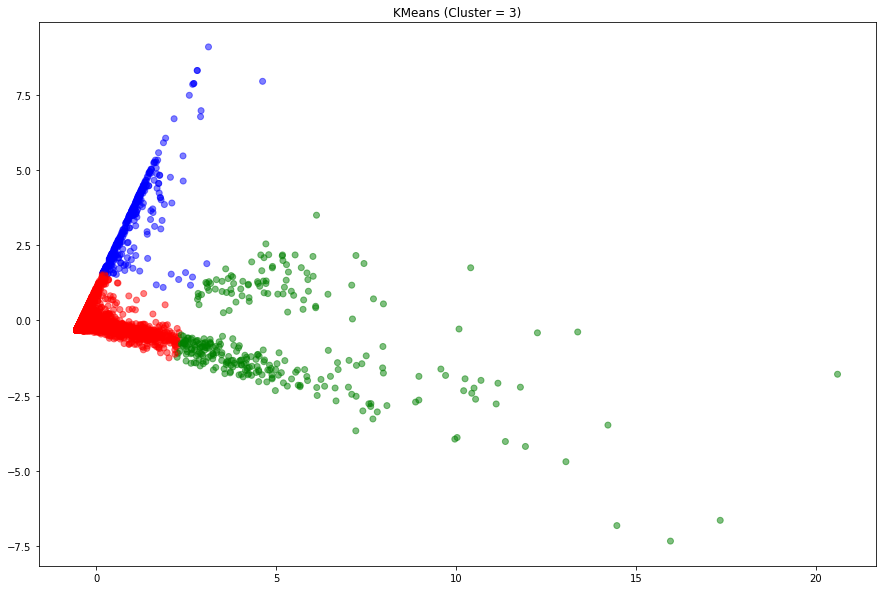

In [21]:
# định nghĩa các màu cho các cụm
Label_color_map={0:'r',1:'g',2:'b'}
label_color=[Label_color_map[i] for i in X_clustered]

# Vẽ biểu đồ phân tán
plt.figure(figsize=(15,10))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)
plt.title('KMeans (Cluster = 3)')
plt.show()

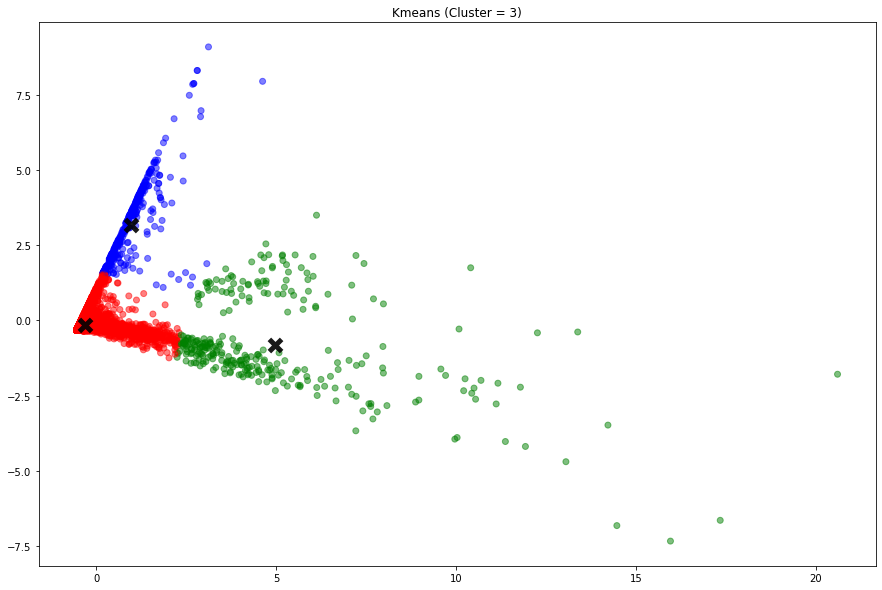

In [22]:
# Vẽ biểu đồ phân tán và centroid (trung tâm cụm)
center=kmeans3.cluster_centers_     # lấy ra vị trí trung tâm của các cụm

plt.figure(figsize=(15,10))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)      # vẽ biểu đồ phân tán
plt.scatter(center[:,0], center[:,1], marker = "x", c='black', s=150,linewidths = 5,alpha=0.9,label='Centroids')   # vẽ các trung tâm của cụm
plt.title('Kmeans (Cluster = 3)')
plt.show()

# Trực quan hóa phân cụm với KMedoids

In [23]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3)

X_clustered = kmedoids.fit_predict(PCA_components)   # dự đoán chỉ số cụm
X_clustered


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

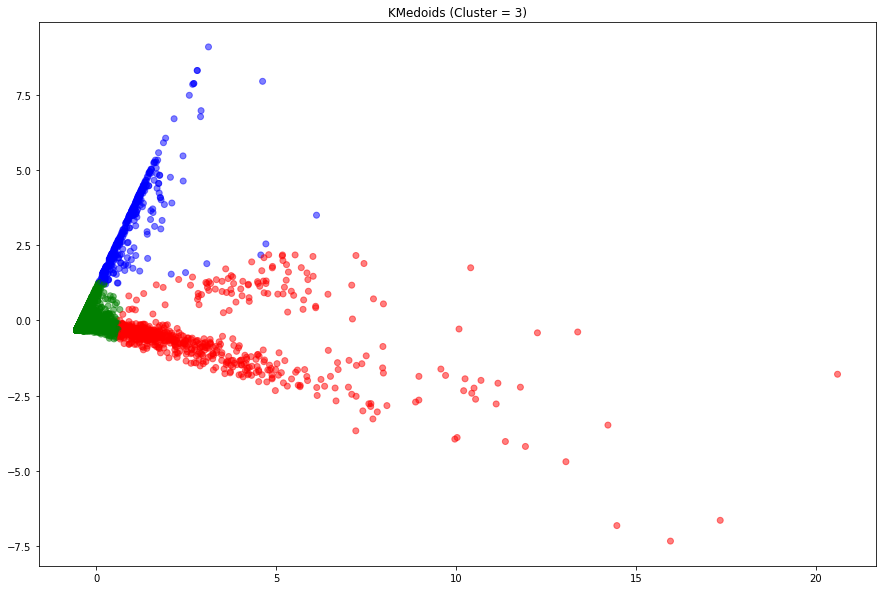

In [24]:
# định nghĩa các màu cho các cụm
Label_color_map={0:'r',1:'g',2:'b'}
label_color=[Label_color_map[i] for i in X_clustered]

# Vẽ biểu đồ phân tán
plt.figure(figsize=(15,10))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)
plt.title('KMedoids (Cluster = 3)')
plt.show()

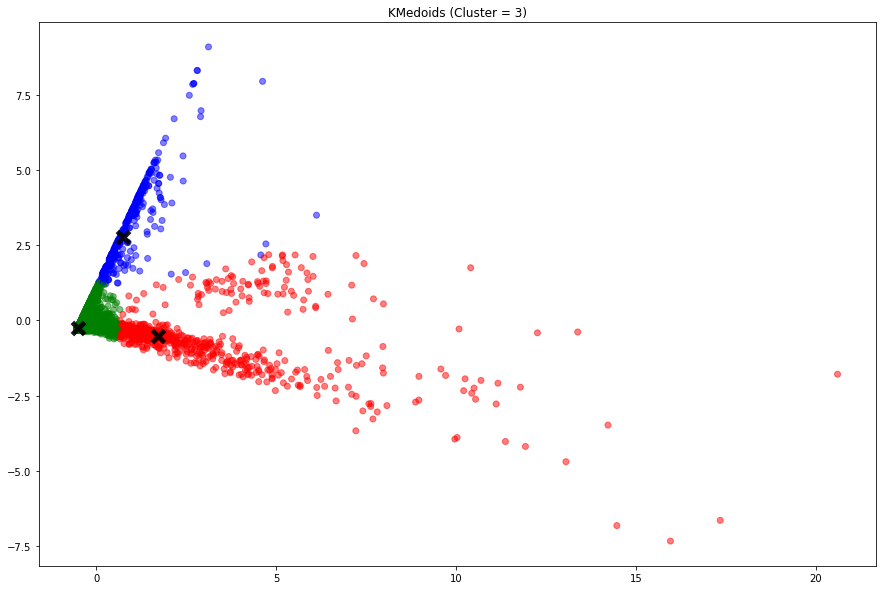

In [25]:
# Vẽ biểu đồ phân tán và centroid (trung tâm cụm)
center = kmedoids.cluster_centers_     # lấy ra vị trí trung tâm của các cụm

plt.figure(figsize=(15,10))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)      # vẽ biểu đồ phân tán
plt.scatter(center[:,0], center[:,1], marker = "x", c='black', s=150,linewidths = 5,alpha=0.9,label='Centroids')   # vẽ các trung tâm của cụm
plt.title('KMedoids (Cluster = 3)')
plt.show()